In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import HashingVectorizer
import itertools
import numpy as np

In [3]:
df = pd.read_csv("fake_or_real_news.csv")

NameError: name 'pd' is not defined

In [10]:
df.shape

(6335, 4)

In [11]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
y = df.label 

In [14]:
df.drop("label", axis=1)

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene..."


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [16]:
count_vectorizer = CountVectorizer(stop_words='english')

In [17]:
count_train = count_vectorizer.fit_transform(X_train)     

In [18]:
count_test = count_vectorizer.transform(X_test)

In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)   

In [20]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

In [21]:
tfidf_test = tfidf_vectorizer.transform(X_test)

In [22]:
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [23]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

difference = set(count_df.columns) - set(tfidf_df.columns)

print(difference)


set()


In [24]:
print(count_df.equals(tfidf_df))

print(count_df.head())

print(tfidf_df.head())


False
   00  000  0000  00000031  000035  00006  ...  ما  محاولات  من  هذا  والمرضى  ยงade
0   0    0     0         0       0      0  ...   0        0   0    0        0      0
1   0    0     0         0       0      0  ...   0        0   0    0        0      0
2   0    0     0         0       0      0  ...   0        0   0    0        0      0
3   0    0     0         0       0      0  ...   0        0   0    0        0      0
4   0    0     0         0       0      0  ...   0        0   0    0        0      0

[5 rows x 56922 columns]
    00  000  0000  00000031  000035  ...  محاولات   من  هذا  والمرضى  ยงade
0  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
1  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
2  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
3  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
4  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0

[

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.857
Confusion matrix, without normalization
[[ 739  269]
 [  31 1052]]
accuracy:   0.893
Confusion matrix, without normalization
[[ 865  143]
 [  80 1003]]


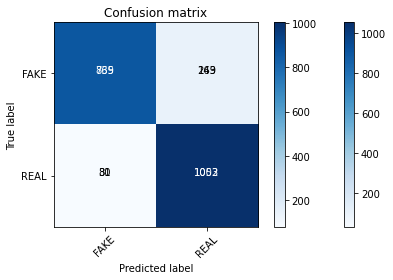

In [31]:
#--------------------------------------------------------------
# Naive Bayes classifier for Multinomial model 
#--------------------------------------------------------------

clf = MultinomialNB() 

clf.fit(tfidf_train, y_train)                       # Fit Naive Bayes classifier according to X, y

pred = clf.predict(tfidf_test)                     # Perform classification on an array of test vectors X.
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)


clf = MultinomialNB()

clf.fit(count_train, y_train)

pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

In [1]:
#--------------------------------------------------------------
# Applying Passive Aggressive Classifier
#--------------------------------------------------------------

linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)


clf = MultinomialNB(alpha=0.1)               # Additive (Laplace/Lidstone) smoothing parameter

last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))


def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):       # inspect the top 30 vectors for fake and real news
    

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()                                            # Array mapping from feature integer indices to feature name
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)
feature_names = tfidf_vectorizer.get_feature_names()

### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]                               # clearly there are certain words which might show political intent and source in the top fake features (such as the words corporate and establishment).

tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))
#print(tokens_with_weights)


NameError: name 'PassiveAggressiveClassifier' is not defined

In [35]:
#--------------------------------------------------------------
# HashingVectorizer : require less memory and are faster (because they are sparse and use hashes rather than tokens)
#--------------------------------------------------------------


hash_vectorizer = HashingVectorizer(stop_words='english', alternate_sign=False)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)


accuracy:   0.902
Confusion matrix, without normalization
[[ 883  125]
 [  80 1003]]


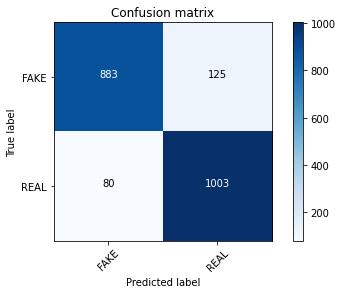

In [36]:
#--------------------------------------------------------------
# Naive Bayes classifier for Multinomial model 
#-------------------------------------------------------------- 

clf = MultinomialNB(alpha=.01)

clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

accuracy:   0.923
Confusion matrix, without normalization
[[938  70]
 [ 92 991]]


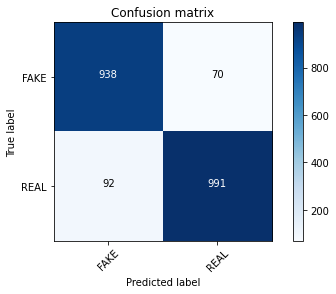

In [38]:
#--------------------------------------------------------------
# Applying Passive Aggressive Classifier
#--------------------------------------------------------------

clf = PassiveAggressiveClassifier(max_iter=50)    

clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)